In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

location                   BETR801  FR04014  London Westminster
datetime                                                       
2019-05-07 00:00:00+00:00     50.5     77.7                32.0
2019-05-08 00:00:00+00:00     23.0     48.9                40.0
2019-05-09 00:00:00+00:00     20.5     50.7                97.0
2019-05-10 00:00:00+00:00     11.5     60.7                52.0
2019-05-11 00:00:00+00:00     26.5     36.8                37.0
2019-05-12 00:00:00+00:00     20.0     46.5                44.0
2019-05-13 00:00:00+00:00     14.5     45.2                39.0
2019-05-14 00:00:00+00:00     14.5     46.1                34.0
2019-05-15 00:00:00+00:00     25.5     48.1                38.0
2019-05-16 00:00:00+00:00     28.0     52.6                34.0
2019-05-17 00:00:00+00:00      NaN     60.5                36.0
2019-05-18 00:00:00+00:00     41.5     67.5                46.0
2019-05-19 00:00:00+00:00     33.0     51.2                49.0
2019-05-20 00:00:00+00:00     40.0     46.9                47.0
2019-05-21 00:00:00+00:00     15.5     75.0                40.0
2019-05-22 00:00:00+00:00     20.5     75.7                34.0
2019-05-23 00:00:00+00:00     60.5     97.0                60.0
2019-05-24 00:00:00+00:00     74.5     54.8                46.0
2019-05-25 00:00:00+00:00     29.0     70.2                47.0
2019-05-26 00:00:00+00:00     53.0     67.0                32.0
2019-05-27 00:00:00+00:00     10.5     34.2                26.0
2019-05-28 00:00:00+00:00     11.0     33.8                31.0
2019-05-29 00:00:00+00:00     21.0     50.5                26.0
2019-05-30 00:00:00+00:00      7.5     29.6                30.0
2019-05-31 00:00:00+00:00      9.0     81.7                37.0
2019-06-01 00:00:00+00:00     52.5     84.7                52.0
2019-06-02 00:00:00+00:00      NaN     40.9                44.0
2019-06-03 00:00:00+00:00      NaN     50.0                24.0
2019-06-04 00:00:00+00:00      NaN     53.5                40.0
2019-06-05 00:00:00+00:00     15.0     59.0                20.0
2019-06-06 00:00:00+00:00      NaN     43.1                24.0
2019-06-07 00:00:00+00:00      NaN     34.5                36.0
2019-06-08 00:00:00+00:00      NaN     47.0                28.0
2019-06-09 00:00:00+00:00     10.0     55.9                26.0
2019-06-10 00:00:00+00:00     18.5     28.1                51.0
2019-06-11 00:00:00+00:00      7.5     59.4                35.0
2019-06-12 00:00:00+00:00     21.0     44.9                45.0
2019-06-13 00:00:00+00:00     28.5     78.3                29.0
2019-06-14 00:00:00+00:00     36.5     74.2                27.0
2019-06-15 00:00:00+00:00     17.5     35.8                26.0
2019-06-16 00:00:00+00:00     42.5     67.3                29.0
2019-06-17 00:00:00+00:00     45.0     73.3                17.0
2019-06-18 00:00:00+00:00      NaN     66.2                 NaN
2019-06-19 00:00:00+00:00      NaN     27.3                 NaN
2019-06-20 00:00:00+00:00      NaN     26.5                 NaN
2019-06-21 00:00:00+00:00      NaN     20.0                 NaN

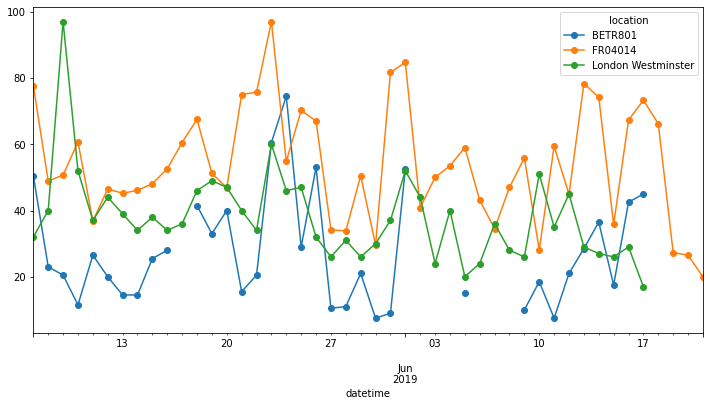

In [38]:
air_quality = pd.read_csv("air_quality.csv")
air_quality = air_quality.rename(columns = {"date.utc" : "datetime"})
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])
min = air_quality["datetime"].min()
max = air_quality["datetime"].max()
max - min


air_quality["month"] = air_quality["datetime"].dt.month
flg , axs = plt.subplots(figsize = (12,4))
air_quality.groupby([air_quality["datetime"].dt.hour])["value"].max().plot(kind = "bar",rot = 0,ax = axs)
plt.xlabel("Hour of  the day")
plt.ylabel("$No2 (µg/m³)")


no2 = air_quality.pivot(index = "datetime",columns = "location",values = "value")
no2.index.weekday
no2.resample("D").max().plot(style = "-o",figsize = (12,6))
no2.resample("D").max()